### CSE

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.datasets.mnist import load_data

Using TensorFlow backend.


In [3]:
(train_digits,train_labels),(test_digits,test_labels)=load_data()
print(train_digits.shape)
print(test_digits.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [4]:
import pandas as pd
pd.Series(train_labels).value_counts

<bound method IndexOpsMixin.value_counts of 0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Length: 60000, dtype: uint8>

In [5]:
pd.Series(test_labels).value_counts

<bound method IndexOpsMixin.value_counts of 0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Length: 10000, dtype: uint8>

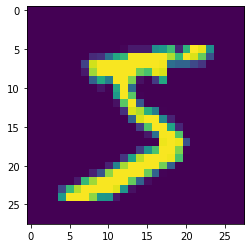

In [6]:
plt.imshow(train_digits[0])

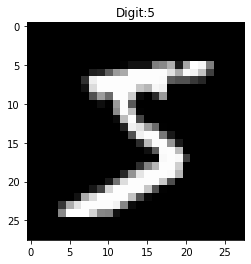

In [7]:
plt.title("Digit:"+str(train_labels[0]))
plt.imshow(train_digits[0],cmap="gray")

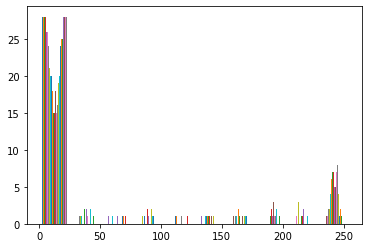

In [8]:
plt.hist(train_digits[0])
plt.show()

In [9]:
samp=np.random.randint(train_digits.shape[0],size=16)
samp

array([19145, 12594, 15847, 24243, 27260, 23133,  2859, 14874, 50187,
       25729, 13271, 30029,  5334,  2160, 37763, 56200])

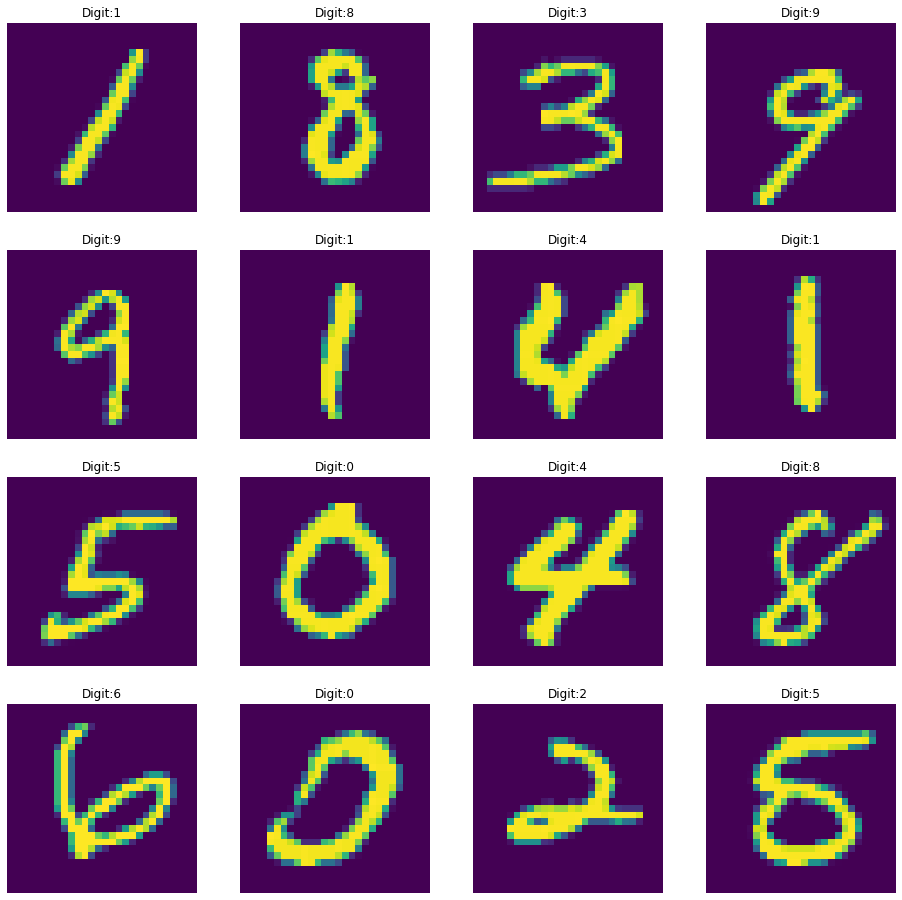

In [10]:
plt.figure(figsize=(16,16))
j=1
for i in samp:
  plt.subplot(4,4,j)
  plt.imshow(train_digits[i])
  plt.title("Digit:"+str(train_labels[i]))
  plt.axis("off")
  j=j+1

In [11]:
train_digits_sc=train_digits/255.0
test_digits_sc=test_digits/255.0

In [12]:
from keras.utils import to_categorical

In [13]:
train_labels_cat=to_categorical(train_labels)

In [14]:
test_labels_cat=to_categorical(test_labels)

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(train_digits_sc,train_labels_cat,test_size=0.1,random_state=32)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(54000, 28, 28)
(6000, 28, 28)
(54000, 10)
(6000, 10)


In [16]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

model = Sequential()
# first layer we need to mention the input shape

model.add(Flatten(input_shape=(28,28)))
## 784 pixel values as input to this Dense. 128 Neurons in the layers
model.add(Dense(128,activation='relu'))# 784 * 128+128
model.add(Dense(128,activation='relu'))# 
model.add(Dense(64,activation='relu'))
model.add(Dense(256,activation='relu'))
#Final layer
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 144,458
Trainable params: 144,458
Non-trainable params: 0
________________________________________________

In [17]:
model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [18]:
history=model.fit(x=x_train,y=y_train,epochs=5,validation_data=(x_val,y_val),batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 7s 128us/step - loss: 0.2478 - accuracy: 0.9241 - val_loss: 0.1517 - val_accuracy: 0.9548
Epoch 2/5
54000/54000 [==============================] - 7s 122us/step - loss: 0.1101 - accuracy: 0.9663 - val_loss: 0.1571 - val_accuracy: 0.9583
Epoch 3/5
54000/54000 [==============================] - 7s 121us/step - loss: 0.0831 - accuracy: 0.9744 - val_loss: 0.1134 - val_accuracy: 0.9702
Epoch 4/5
54000/54000 [==============================] - 7s 124us/step - loss: 0.0646 - accuracy: 0.9801 - val_loss: 0.1153 - val_accuracy: 0.9705
Epoch 5/5
54000/54000 [==============================] - 7s 123us/step - loss: 0.0535 - accuracy: 0.9831 - val_loss: 0.1217 - val_accuracy: 0.9693


In [19]:
model.evaluate(test_digits_sc,test_labels_cat)

10000/10000 [==============================] - 0s 29us/step


[0.11014243417466059, 0.97079998254776]

In [20]:
print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [21]:
model.predict(np.expand_dims(test_digits_sc[0],axis=0))

array([[2.8016409e-08, 7.1844270e-06, 4.6565347e-06, 1.0936827e-06,
        7.1496295e-08, 1.1814443e-07, 1.8719644e-11, 9.9990153e-01,
        1.4140386e-07, 8.5230859e-05]], dtype=float32)

In [22]:
model.predict(test_digits_sc[:10])

array([[2.80164087e-08, 7.18443380e-06, 4.65653920e-06, 1.09368375e-06,
        7.14964372e-08, 1.18144648e-07, 1.87196786e-11, 9.99901533e-01,
        1.41403859e-07, 8.52309386e-05],
       [3.24655218e-08, 2.02363626e-05, 9.99973893e-01, 2.94402639e-06,
        2.73770013e-07, 5.02391053e-08, 1.61820040e-07, 2.41764246e-06,
        1.90513454e-08, 1.85136684e-10],
       [6.56223392e-06, 9.99343932e-01, 2.22948351e-04, 4.64591585e-06,
        3.10295800e-05, 1.90788687e-05, 3.23289714e-04, 1.55791749e-05,
        3.20408944e-05, 8.71065595e-07],
       [9.99330878e-01, 2.00514116e-09, 5.50019438e-04, 6.10961069e-06,
        2.57980361e-07, 6.09668064e-07, 5.17699955e-05, 2.05152716e-07,
        2.77037117e-07, 5.98996885e-05],
       [4.15415649e-08, 9.39252587e-09, 4.09202499e-07, 1.08026569e-07,
        9.99989629e-01, 2.72668501e-07, 4.77429467e-07, 8.62305455e-07,
        1.44836332e-09, 8.16923421e-06],
       [1.81379406e-07, 9.99986291e-01, 2.82014798e-06, 5.45487531e-08,
   

In [23]:
model.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))

array([7])

In [24]:
model.predict_proba(np.expand_dims(test_digits_sc[0],axis=0))

array([[2.8016409e-08, 7.1844270e-06, 4.6565347e-06, 1.0936827e-06,
        7.1496295e-08, 1.1814443e-07, 1.8719644e-11, 9.9990153e-01,
        1.4140386e-07, 8.5230859e-05]], dtype=float32)

In [25]:
history.history

{'accuracy': [0.9240556, 0.9662778, 0.9744259, 0.98007405, 0.98305553],
 'loss': [0.24775694658220918,
  0.11007659681369034,
  0.08310751750515084,
  0.06462690685717044,
  0.05353790246480127],
 'val_accuracy': [0.9548333287239075,
  0.9583333134651184,
  0.9701666831970215,
  0.9704999923706055,
  0.9693333506584167],
 'val_loss': [0.15174406527231138,
  0.1570743273148934,
  0.1133534084620575,
  0.11527723016993453,
  0.12169556098462393]}

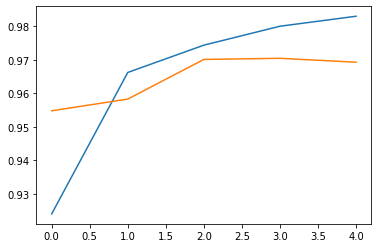

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [27]:
model1 = Sequential()
# first layer we need to mention the input shape

model1.add(Flatten(input_shape=(28,28)))
## 784 pixel values as input to this Dense. 128 Neurons in the layers
model1.add(Dense(128,activation='relu'))# 784 * 128+128
model1.add(Dense(256,activation='relu'))# 
model1.add(Dense(64,activation='relu'))
model1.add(Dense(256,activation='relu'))
#Final layer
model1.add(Dense(10,activation='sigmoid'))
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                2570      
Total params: 169,162
Trainable params: 169,162
Non-trainable params: 0
________________________________________________

In [28]:
model1.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [29]:
history=model1.fit(x=x_train,y=y_train,epochs=5,validation_data=(x_val,y_val),batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 8s 141us/step - loss: 0.2659 - accuracy: 0.9212 - val_loss: 0.1546 - val_accuracy: 0.9537
Epoch 2/5
54000/54000 [==============================] - 7s 133us/step - loss: 0.1159 - accuracy: 0.9643 - val_loss: 0.1065 - val_accuracy: 0.9703
Epoch 3/5
54000/54000 [==============================] - 7s 138us/step - loss: 0.0837 - accuracy: 0.9747 - val_loss: 0.1080 - val_accuracy: 0.9717
Epoch 4/5
54000/54000 [==============================] - 7s 132us/step - loss: 0.0649 - accuracy: 0.9798 - val_loss: 0.1112 - val_accuracy: 0.9712
Epoch 5/5
54000/54000 [==============================] - 7s 136us/step - loss: 0.0551 - accuracy: 0.9831 - val_loss: 0.1283 - val_accuracy: 0.9693


In [30]:
model1.evaluate(test_digits_sc,test_labels_cat)

10000/10000 [==============================] - 0s 32us/step


[0.10460382611152018, 0.9735999703407288]

In [31]:
print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [32]:
model.predict(np.expand_dims(test_digits_sc[0],axis=0))

array([[2.8016409e-08, 7.1844270e-06, 4.6565347e-06, 1.0936827e-06,
        7.1496295e-08, 1.1814443e-07, 1.8719644e-11, 9.9990153e-01,
        1.4140386e-07, 8.5230859e-05]], dtype=float32)

In [33]:
model.predict(test_digits_sc[:10])

array([[2.80164087e-08, 7.18443380e-06, 4.65653920e-06, 1.09368375e-06,
        7.14964372e-08, 1.18144648e-07, 1.87196786e-11, 9.99901533e-01,
        1.41403859e-07, 8.52309386e-05],
       [3.24655218e-08, 2.02363626e-05, 9.99973893e-01, 2.94402639e-06,
        2.73770013e-07, 5.02391053e-08, 1.61820040e-07, 2.41764246e-06,
        1.90513454e-08, 1.85136684e-10],
       [6.56223392e-06, 9.99343932e-01, 2.22948351e-04, 4.64591585e-06,
        3.10295800e-05, 1.90788687e-05, 3.23289714e-04, 1.55791749e-05,
        3.20408944e-05, 8.71065595e-07],
       [9.99330878e-01, 2.00514116e-09, 5.50019438e-04, 6.10961069e-06,
        2.57980361e-07, 6.09668064e-07, 5.17699955e-05, 2.05152716e-07,
        2.77037117e-07, 5.98996885e-05],
       [4.15415649e-08, 9.39252587e-09, 4.09202499e-07, 1.08026569e-07,
        9.99989629e-01, 2.72668501e-07, 4.77429467e-07, 8.62305455e-07,
        1.44836332e-09, 8.16923421e-06],
       [1.81379406e-07, 9.99986291e-01, 2.82014798e-06, 5.45487531e-08,
   

In [34]:
model.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))

array([7])

In [35]:
model.predict_proba(np.expand_dims(test_digits_sc[0],axis=0))

array([[2.8016409e-08, 7.1844270e-06, 4.6565347e-06, 1.0936827e-06,
        7.1496295e-08, 1.1814443e-07, 1.8719644e-11, 9.9990153e-01,
        1.4140386e-07, 8.5230859e-05]], dtype=float32)

In [36]:
history.history

{'accuracy': [0.92120373, 0.9643148, 0.97474074, 0.9798333, 0.9831296],
 'loss': [0.2659279983394124,
  0.11590227216882286,
  0.08365750229303484,
  0.06486292815805171,
  0.055136562255055956],
 'val_accuracy': [0.9536666870117188,
  0.9703333377838135,
  0.971666693687439,
  0.9711666703224182,
  0.9693333506584167],
 'val_loss': [0.15458188768227896,
  0.10654538602754474,
  0.10796550505359967,
  0.11121123522147536,
  0.12832880963540325]}

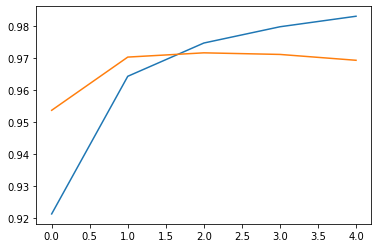

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])